# Chapter 2: Classification

As we have learned in the previous chapter *classification* belongs to the field of *supervised learning*. In such problems the aim is to predict a category. Such categories can be 

- ok/not ok
- good / bad / dont't know
- digit 0 ... / digit 9
- etc 

In this chapter we introduce the core concepts of classification.

## How could we  build  a simple classifier  ?

## Geometrical interpretation of feature vectors


If you take the values of an input-feature vector you can imagine it as a point in a d-dimensional space.


E.g. if a data set consists of  feature vectors of length 2, you can interpret the first feature value as a x-coordinate and the second value as a y-coordinate.

Labeled features then group such points to different point clouds.



### Example

For sake of simplicity we restrict our beer data set to two features: `alcohol_content` and `bitterness`.

The following plot shows how these reduced feature vectors can be interpreted as point clouds. For every feature vector we color the points in green or red to indicate the according classes:

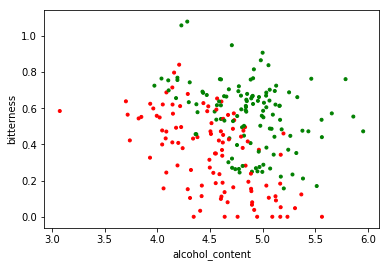

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read some data
beer_data = pd.read_csv("beers.csv")

xv = beer_data["alcohol_content"]
yv = beer_data["bitterness"]

colors = ["rg"[i] for i in beer_data["is_yummy"]]

plt.scatter(xv, yv, color=colors, marker='.');
plt.xlabel("alcohol_content")
plt.ylabel("bitterness");

This plot tells us that:
1. The two features lack information for a 100% separation of the classes. 
2. We could draw a line to separate most points of both clouds.
3. Later we could use this line to make a guess for classifying a new feature vector.

Eventually **classification is about finding a procedure to separate two or more point clouds.**

Now we can see how additional features can support (improve?) classification. We add the `darkness` feature as the third dimension.


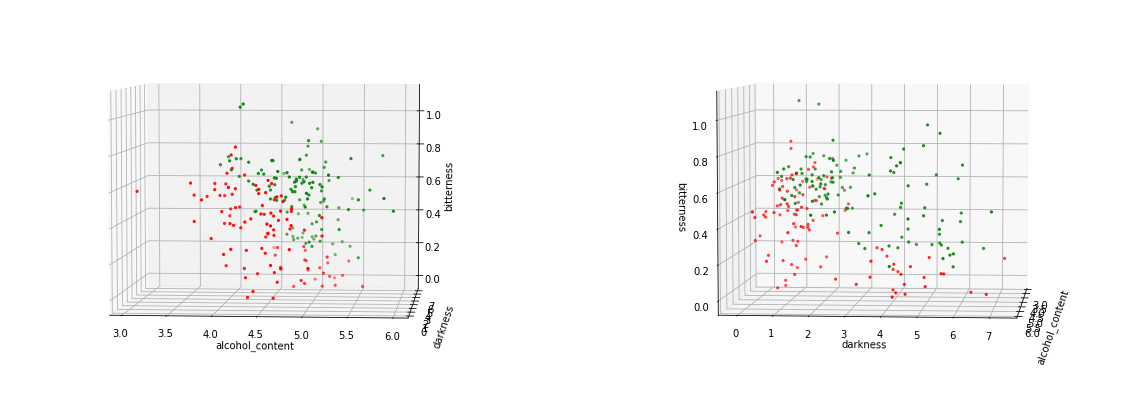

In [3]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 7))

xv = beer_data["alcohol_content"]
yv = beer_data["darkness"]
zv = beer_data["bitterness"]

colors = ["rg"[i] for i in beer_data["is_yummy"]]

def plot(ax):
    ax.scatter(xv, yv, zv, c=colors, marker='.') 

    ax.set_xlabel('alcohol_content')
    ax.set_ylabel('darkness')
    ax.set_zlabel('bitterness');

ax = fig.add_subplot(121, projection='3d')

plot(ax)
ax.view_init(5, 275)

ax = fig.add_subplot(122, projection='3d')
plot(ax)
ax.view_init(5, 5);

The first view is very similar to the scatter plot before and we don't see the effects of the third feature.

The second view shows the same cube rotated by 90˚ to the left. We see that the new dimenission adds extra information which could improve separation.

If we look at the beer example, we can assume that the person who rated beers has preferences like, "I don't like high alcohol content", "I like fruity beer", etc.

This means we could construct a score where high numbers relate to "favorable beer". One simple way to implement such a score is to use a weighted sum like


     score = -0.1 * alcohol_content + 4 * bitterness + 0.8 * darkness + 1.8 * fruitiness 

Positive weights contribute to a heigher score and negative weights to a lower.

The actual weights here are guessed and serve as an example.

The size of the numbers also reflects the numerical ranges of the features: alcohol content is in the range 3 to 5.9, where as bitterness is between 0 and 1.08:

In [4]:
beer_data.describe()

alcohol_content  bitterness    darkness  fruitiness    is_yummy
count       225.000000  225.000000  225.000000  225.000000  225.000000
mean          4.711873    0.463945    2.574963    0.223111    0.528889
std           0.437040    0.227366    1.725916    0.117272    0.500278
min           3.073993    0.000000    0.000000    0.000000    0.000000
25%           4.429183    0.281291    1.197640    0.135783    0.000000
50%           4.740846    0.488249    2.026548    0.242396    1.000000
75%           5.005170    0.631056    4.043995    0.311874    1.000000
max           5.955272    1.080170    7.221285    0.535315    1.000000

In [5]:
scores =( -0.1 * beer_data["alcohol_content"] + 3 * beer_data["bitterness"] 
          + 0.8 * beer_data["darkness"] + 1.8 * beer_data["fruitiness"])

Now we can plot the histogram of the scores by classes:

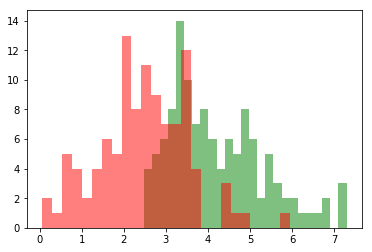

In [6]:
scores_good = scores[beer_data["is_yummy"] == 1]
scores_bad = scores[beer_data["is_yummy"] == 0]

plt.hist(scores_good,  bins=25, color="green", alpha=.5) 
plt.hist(scores_bad, bins=25, color="red", alpha=.5);

Consequence: A simple classifier could use these scores and use a threshold around 3.5 to assign a class label.

**This is how so called linear classifiers work. The magic is in computing the weights and the final threshold to guarantee good results.**

*Comment*: although this seems to be a simple concept, linear classifiers can work very well, especially for higher resp. very high dimensions.

## Geometrical interpretation of feature vectors

If you take the values of a input-feature vector you can imagine this as a point in a d-dimensional space.


E.g. if a data set consists of  feature vectors of length 2, you can interpret the first feature value as a x-coordinate and the second value as a y-coordinate.

Labeled features then group such points to different point clouds.



### Example

For sake of simplicity we restrict our beer data set to two features: `alcohol_content` and `bitterness`.

The following plot shows how these reduced feature vectors can be interpreted as point clouds. For every feature vector we color points in green or red to indicate the according classes:

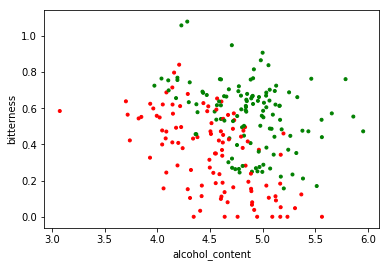

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# read some data
beer_data = pd.read_csv("beers.csv")

xv = beer_data["alcohol_content"]
yv = beer_data["bitterness"]

colors = ["rg"[i] for i in beer_data["is_yummy"]]

plt.scatter(xv, yv, color=colors, marker='.');
plt.xlabel("alcohol_content")
plt.ylabel("bitterness");


What do we see here ?

1. Both point clouds overlap, this tells us that the two features lack information for a 100% separation of classes. 
2. We could draw a line to separate most points of both clouds.
3. Later we could use this line to make a guess for classifying a new feature vector.

Eventually **classification is about finding a procedure to separate point clouds in an n-dimesional space.**

Next we illustrate how more features can support classification. We add the `darkness` feature as third dimension.


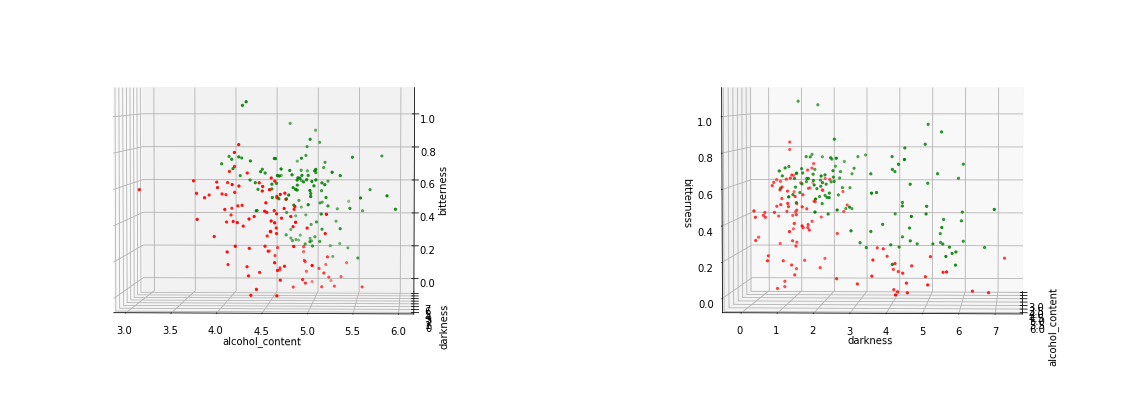

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 7))

xv = beer_data["alcohol_content"]
yv = beer_data["darkness"]
zv = beer_data["bitterness"]

colors = ["rg"[i] for i in beer_data["is_yummy"]]

def plot(ax):
    ax.scatter(xv, yv, zv, c=colors, marker='.') 

    ax.set_xlabel('alcohol_content')
    ax.set_ylabel('darkness')
    ax.set_zlabel('bitterness');

ax = fig.add_subplot(121, projection='3d')

plot(ax)
ax.view_init(3, 273)

ax = fig.add_subplot(122, projection='3d')
plot(ax)
ax.view_init(3, 3);

The first view is very similar to the scatter plot before as we don't see the effects of the third feature. 

The second view shows the same cube rotated by 90˚ to the left. We see that the new dimenission adds extra information which could improve separation. So tiling the plane which separates in the first view could improve separation.


## Decision surfaces

For a weighted sum of two features `x` and `y` the equation


     weight_x * x + weight_y * y = threshold
     

defines a line in 2d space. Points fulfilling

     weight_x * x + weight_y * y < threshold
      
      
vs

     weight_x * x + weight_y * y > threshold
      

are located on opposite sides of this line. Such a classifier thus determines a line which separates the feature space in two parts according to the two classes.

Lets visualize this! 

We 

- create random points in 2D,
- compute scores for given weights
- split points according to their score compared to the threshold 
- plot them in different colors.

Additionally we did some math and computed the decision line:

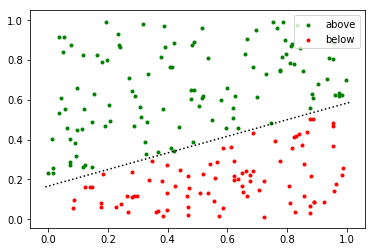

In [9]:
import numpy as np

wx = -.5
wy = 1.2
threshold = 0.2

weights = np.array((wx, wy))
points_2d = np.random.random((200, 2))
scores = points_2d @ weights   # matrix - vector product

above_points = points_2d[scores > threshold]
below_points = points_2d[scores < threshold]

plt.scatter(above_points[:, 0], above_points[:, 1], c="g", marker=".", label="above")
plt.scatter(below_points[:, 0], below_points[:, 1], c="r", marker=".", label="below")

# plot decision line
x = np.linspace(-.01, 1.01, 2)
y = threshold / weights[1] - weights[0] / weights[1] * x
plt.plot(x, y, 'k:')
plt.legend();

**Higher dimensions**: For 3D features a linear classifiers separates classes by a plane, and for higher dimensions `n` we get `n-1` dimensional planes.

### Example

In the beer example, features fulfilling

    -0.1 * alcohol_content + 4 * bitterness + 0.8 * darkness + 1.9 * fruitiness == threshold
    
are located on a 3D-plane in 4D. 

Points in the "not yummy" class fulfilling

    -0.1 * alcohol_content + 4 * bitterness + 0.8 * darkness + 1.9 * fruitiness < threshold
    
and points in the "yummy class"

    -0.1 * alcohol_content + 4 * bitterness + 0.8 * darkness + 1.9 * fruitiness > threshold
    
are located on different sides of this plane.

Again: **Here the classifier separates the 4d space into two parts, the separation boundary is a plane in this space.**

To illustrate this, we use ignore `fruitiness` such that we have 3 features:

**REPEAT!!**


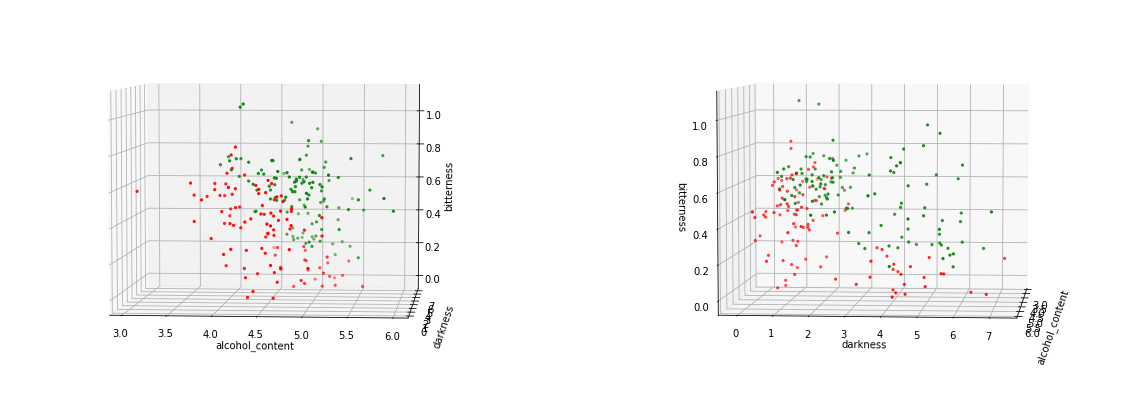

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20, 7))

xv = beer_data["alcohol_content"]
yv = beer_data["darkness"]
zv = beer_data["bitterness"]

colors = ["rg"[i] for i in beer_data["is_yummy"]]

def plot(ax):
    ax.scatter(xv, yv, zv, c=colors, marker='.') 

    ax.set_xlabel('alcohol_content')
    ax.set_ylabel('darkness')
    ax.set_zlabel('bitterness');

ax = fig.add_subplot(121, projection='3d')

plot(ax)
ax.view_init(5, 275)

ax = fig.add_subplot(122, projection='3d')
plot(ax)
ax.view_init(5, 5);

The first view is very similar to the scatter plot we have already seen before as we barely can see the effects of the third feature.

The second view shows the same cube rotated by 90˚ to the left. We see that the new dimenission adds extra information which could improve separation.

### About 2D examples

For the sake of simplicity and visualisation we continue with 2 dimensional examples.

It is clear that such examples only represent very small subset of realistic ML scenarios. But most concepts can be illustrated in 2- or 3D without loss of generality.

The examples also might look artificial, but general classifiers should work on all kind of problems.

## More complex decision surfaces

The next example data set can not bew classified by a line, the decision line is curved:


In [165]:
df = pd.read_csv("2d_points.csv")
df.head(3)

a         b  label
0 -3.591782  3.612599      1
1  6.580586 -2.105557      1
2 -0.670938 -5.905074      1

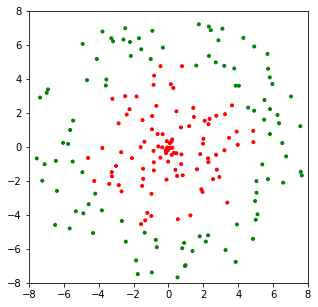

In [285]:
xv = df["a"]
yv = df["b"]

colors = ["rg"[i] for i in df["label"]]
plt.figure(figsize=(5, 5))
plt.xlim([-8, 8])
plt.ylim([-8, 8])
plt.scatter(xv, yv, color=colors, marker=".");

In this case the decision line is curved and is looks like a circle. A hand-crafted classifier could classify new points based on their distance to the center.


It should be clear that a linear classifier is not suitable for this problem !

### Example for feature engineering

To improve ML performance we can try to enhance / transform a given feature-set by transformations. This process is called **feature engineering**.

In the previous example we see that the distance of the origin of a point could be used to implement a classifier.

Computing the distance of a point to the origin (0, 0) using the euclidian formula includes terms $x^2$ and $y^2$. 

Let us create a scatter plot for this transformation:

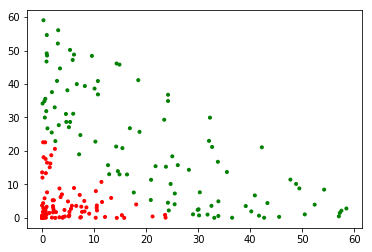

In [286]:
plt.scatter(xv ** 2, yv ** 2, color=colors, marker='.');

As you can see both sets can be separated by a line now !

### Another example for feature engineering

**COMMENT UWE: is this section too much ?**

The so called "xor-problem" is a typical benchmark problem for machine learning. The following example illustrates this problem:

In [370]:
xor = pd.read_csv("xor.csv")
xor.head()

x         y  label
0 -1.539782  0.950822  False
1  0.436266 -1.768324  False
2 -1.466436  1.391890  False
3 -1.037642 -0.953587   True
4 -0.691444 -0.219826   True

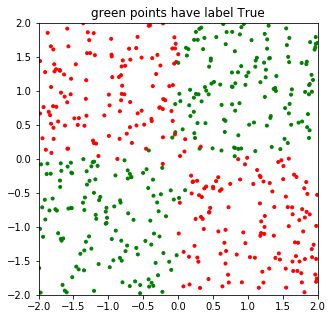

In [349]:
xv = xor["x"]
yv = xor["y"]

colors = ["rg"[i] for i in xor["label"]]
plt.figure(figsize=(5, 5))
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title("green points have label True")
plt.scatter(xv, yv, color=colors, marker=".");

Again, this example data set can not be separated by a line. But we see that points where the sign of x and y are the same appear to form one class, and point with different signs for x and y belong to the other class.

How can we engineer a more descriptive feature which describes "x and y have the same sign" ? Here we can use the fact that the product of two numbers is postive if and only if both numbers have the same sign.

So lets plot a histogram over `x * y`:

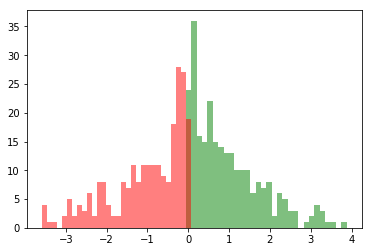

In [350]:
products = xor["x"] * xor["y"]

features_class_true = products[xor["label"]]
features_class_false = products[~xor["label"]]

plt.hist(features_class_true,  bins=30, color="g", alpha=.5, histtype="stepfilled")
plt.hist(features_class_false,  bins=30, color="r", alpha=.5, histtype="stepfilled");

In this case a simple classifier would just introduce a threshold of 0 to distinguish both classes.

### Other examples of feature engineering


Feature engineering requires understanding your data to extract meaningful and discriminative (?) information.

Proper feature engineering can boost the performance of a classifier significantly.

Examples:

- ~~nudity classifier~~: color histograms of full image and image patches


- spam classifier: choice of dictionary, extra feature which counts words only in capital cases or words with unusual characters (like "pill$")


- to distinguish background noise from speach audio samples, the frequency distribution might help. Also std deviation  or a histogram of loudness / energy of a sample might help.


- to classify DNA sequences, n-gram histograms (n>=1) can be benefitial (-> GC content).


- for geopolitical data a feature "state"  can be enhanced by "political system" and or "GBP".


- for sales data add a feature "is week day".


Most cases are beyond the 2- or 3D case and visual inspection can be difficult. Thus engineering features as we did in the 2D examples becomes tricky. But here are some general recommendations:

- use statistics (mean, std deviations, higher order features) as well as histograms if applicable.

- polynomial features (e.g. extend `x, y` to `x, y, x * y, x ** 2, y ** 2`) (see examples section).

- image classification: dig into *computer vision* to learn about image descriptors.

- audio classification: learn about FFT, wavelets, filter banks, power spectrum, ...

- try to incorporate external data.

*Comment*: 

We will see later that adding too many features can introduce other problems (-> *overfitting*) but there are also methods for feature selection in this case (see https://scikit-learn.org/stable/modules/feature_selection.html)

## Examples below only discuss the two classes case !?


The following examples in this script will only consider two class problems. 
Before we dig deeper into classification, we want to say a few words on how can we handle more than two classes. 


The general idea for `n > 2` classes is to build multiple 2-class classifiers and determine a winner:

- the **one-vs-all** approach builds `n` classifiers for "label n vs. the rest". 


- the **one-vs-one** approach builds  classifiers for `label i vs label j` (in total `n x (n - 1) / 2` classifiers).

For new incoming data then the `n` resp. `n x n` classifiers are applied and the overall winner class is the final result.

For the digit classificaton example:

- we could build 10 classifiers `is it 0 or one of the others`, `is it 1 one or one of the others`, etc.
  
  A new image then would hopefully yield `True` for exactly one of the classifier, in other situations the result is unclear.
   
   
- we could build 45 classifiers `is it 0 or 1`, `is it 0 or 2`, etc.

  For a new image we could choose the final outcome based on which of the classifiers "wins" most often.


#### Note:
In `scikit-learn` many classifiers support such multi-class problems out of the box and also offers functionalities to implement `one-vs-all` or `one-vs-one` for specific cases. See https://scikit-learn.org/stable/modules/multiclass.html

## Exercise section

1. Modify the weights in the beer classifiers and check if you can improve separation in the histogram.

Try weights  `[-0.05837955,  3.69479038,  0.6666397 ,  1.62751838]` in the beer classifier. These are the weights the `LogisticRegression` classifier in the previous script computed.



2. The following script learns classifiers on different data sets and plots decision surfaces.

487 out of 500 predicted correctly


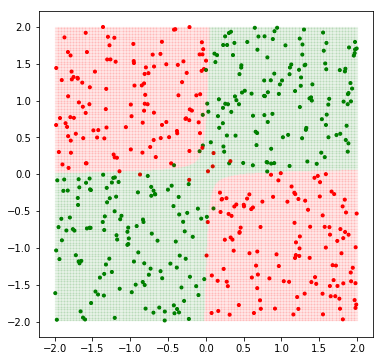

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


def train_and_plot_decision_surface(clf, preproc, features, labels, marker=".", N=400):
    
    features = np.array(features)
    xmin, ymin = features.min(axis=0)
    xmax, ymax = features.max(axis=0)
    
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N) 
    points = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
  

    if preproc is not None:
        points_for_clf = preproc.fit_transform(points)
        features = preproc.fit_transform(features)
    else:
        points_for_clf = points
    
    clf.fit(features, labels)
    predicted = clf.predict(features)
    print(sum(predicted == labels), "out of", len(labels), "predicted correctly")
    classes = np.array(clf.predict(points_for_clf), dtype=bool) 
    plt.plot(points[classes][:, 0], points[classes][:, 1], "g" + marker, markersize=1, alpha=.05);
    plt.plot(points[~classes][:, 0], points[~classes][:, 1], "r" + marker, markersize=1, alpha=.05);


df = pd.read_csv("2d_points.csv")
df = pd.read_csv("xor.csv")

features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

plt.figure(figsize=(6, 6));

clf = LinearSVC()
# clf = LogisticRegression()
# clf = SVC(gamma=.1)
# clf = DecisionTreeClassifier(max_depth=6)
# clf = KNeighborsClassifier(10)

preproc = PolynomialFeatures()
# preproc = None

train_and_plot_decision_surface(clf, preproc, features, labels)

colors = ["rg"[i] for i in labels]
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], color=colors, marker='.');

- modify the script to use the `xor.csv` data set.

- play with the other classifiers which are outcommented in the script and play with their parameters and deactivate the feature engineering step.


In [369]:
#REMOVEBEGIN
# THE LINES BELOW ARE JUST FOR STYLING THE CONTENT ABOVE !

from IPython import utils
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    base = utils.path.get_ipython_dir()
    styles = """<style>
    
    @import url('http://fonts.googleapis.com/css?family=Source+Code+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Kameron');
    @import url('http://fonts.googleapis.com/css?family=Crimson+Text');
    
    @import url('http://fonts.googleapis.com/css?family=Lato');
    @import url('http://fonts.googleapis.com/css?family=Source+Sans+Pro');
    
    @import url('http://fonts.googleapis.com/css?family=Lora'); 

    
    body {
        font-family: 'Lora', Consolas, sans-serif;
       
        -webkit-print-color-adjust: exact important !;
        
      
       
    }
    .rendered_html code
    {
        color: black;
        background: #eaf0ff;
        background: #f5f5f5; 
        padding: 1pt;
        font-family:  'Source Code Pro', Consolas, monocco, monospace;
    }
    
    p {
      line-height: 140%;
    }
    
    strong code {
        background: red;
    }
    
    em  {
        color: green;
    }
    
    .rendered_html strong code
    {
        background: #f5f5f5;
    }
    
    .CodeMirror pre {
    font-family: 'Source Code Pro', monocco, Consolas, monocco, monospace;
    }
    
    .cm-s-ipython span.cm-keyword {
        font-weight: normal;
     }
     
     strong {
         background: #f5f5f5;
         margin-top: 4pt;
         margin-bottom: 4pt;
         padding: 2pt;
         border: 0.5px solid #a0a0a0;
         font-weight: bold;
         color: darkred;
     }
     
    
    div #notebook {
        # font-size: 10pt; 
        line-height: 145%;
        }
        
    li {
        line-height: 145%;
    }

    div.output_area pre {
        background: #fff9d8 !important;
        padding: 5pt;
       
       -webkit-print-color-adjust: exact; 
        
    }
 
    
 
    h1, h2, h3, h4 {
        font-family: Kameron, arial;
    }
    
    div#maintoolbar {display: none !important;}
    </style>"""
    return HTML(styles)
css_styling()
#REMOVEEND

/Users/uweschmitt/Projects/machinelearning-introduction-workshop/venv3.6/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: get_ipython_dir has moved to the IPython.paths module since IPython 4.0.
  if __name__ == '__main__':
